Epoch 1/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3299
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3107
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2986
Epoch 4/50
50/50 [==============================] - 0s 957us/step - loss: 0.2930
Epoch 5/50
50/50 [==============================] - 0s 922us/step - loss: 0.2886
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2850
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2852
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2836
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2852
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2825
Epoch 11/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2805
Epoch 12/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2776
Epoch 13/50
50/50 [==========================

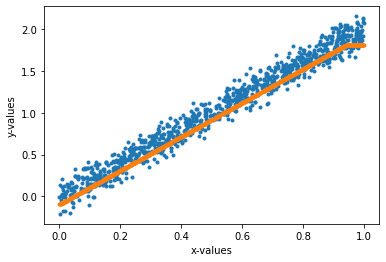

The Simple NN was initiliazed with the weights: alpha_init =  -10  beta_init =  -1.5  b_init =  1.5  h_init =  1.5
Constraints:
The horizontal part of the ReLU is right of the interval [0,1].
(i)  b/beta =  -0.94213897  =  0.19705695 / -0.2091591  <=? -1
(ii)  alpha_prime =  2  =?  2.0272775  =  -9.692513 * -0.2091591  = alpha * beta
(iii)  h =  1.8120152  =?  1.9099771  = - -9.692513 * 0.19705695  = -alpha * b


In [128]:
#generating random data from a linear function and adding noise
#generate x-values uniformly inside the interval [0,1]
import numpy as np
X_data = np.random.uniform(0, 1, 1000)

#generate noise with normal distribution
noise = np.random.normal(0, 0.1, X_data.size)

#generate values of the linear function: f(x) = alpha_prime * x
#and add the noise
alpha_prime = 2
y_data = alpha_prime * X_data + noise


#build the model
#import the necessary functions from the tensorflow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#introduce the learning model: one hidden layer and one hidden node
model = Sequential()
model.add(Dense(1, input_dim=1, activation='relu', use_bias=True))
model.add(Dense(1, activation='linear', use_bias=True))

#set the weights to custom values
alpha_init = -10
beta_init = -1.5
b_init = 1.5
h_init = 1.5
model.set_weights([np.array([[beta_init]]), np.array([b_init]), np.array([[alpha_init]]), np.array([h_init])])

#compile the model
model.compile(loss='mean_squared_error', optimizer='SGD')

#fit the model to our data
model.fit(X_data, y_data, epochs=50, batch_size=20)


#evaluate the model
predictions = model.predict(X_data)

import matplotlib.pyplot as plt

plt.clf()
plt.plot(X_data,y_data,'.')
plt.plot(X_data,predictions,'.')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

#get the weights of the NN
[[[beta]], [b], [[alpha]], [h]] = model.get_weights()

print('The Simple NN was initiliazed with the weights: alpha_init = ', alpha_init,' beta_init = ',\
      beta_init,' b_init = ', b_init,' h_init = ',h_init)

print('Constraints:')

if h <= 0.3 and alpha > 0 and beta > 0:
    print('The horizontal part of the ReLU is left of the interval [0,1].')
    print('(i)  b/beta = ', b/beta,' = ', b, '/', beta, ' >=? 0' )
else: 
    if h >= alpha_prime - 0.3 and alpha < 0 and beta < 0:
        print('The horizontal part of the ReLU is right of the interval [0,1].')
        print('(i)  b/beta = ', b/beta,' = ', b, '/', beta, ' <=? -1' )
    else:
        print('The Simple NN did not manage to fit the data well.')
        print('(i.case1)  b/beta = ', b/beta,' = ', b, '/', beta, ' >=? 0' )
        print('(i.case2)  b/beta = ', b/beta,' = ', b, '/', beta, ' <=? -1' )

print('(ii)  alpha_prime = ', alpha_prime, ' =? ', alpha*beta, ' = ', alpha, '*', beta, ' = alpha * beta')
print('(iii)  h = ',h ,' =? ',-alpha * b, ' = -', alpha, '*', b,  ' = -alpha * b' )
